In [1]:
# Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats


In [2]:
df = pd.read_csv('ProjectTweets.csv')
# looking at the dataset
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
df.rename(columns={'0': 'number','1467810369':'id','Mon Apr 06 22:19:45 PDT 2009': 'date','NO_QUERY': 'flag','_TheSpecialOne_': 'user' }, inplace=True)



In [4]:
df.head()

,number,id,date,flag,user,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
new_column_name = 'text'
df.rename(columns={df.columns[5]: new_column_name}, inplace=True)

df.head()

,number,id,date,flag,user,text
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df['flag'].value_counts()

flag
NO_QUERY    1599999
Name: count, dtype: int64

In [7]:
df=df.drop(columns=['number','id', 'flag'])
df.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [8]:
df_for_clean= df 
df_for_clean.to_csv('df_for_clean.csv', index=False)

In [9]:
# Text transformation to lowercase
df['text'] =df['text'].str.lower()
df['text']

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [10]:
# URL removal from text
df['text'] = df['text'].apply(lambda x:re.sub(r"http\S+", "", x))
df["text"]

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [11]:
import string

In [12]:
# Punctuation from text
punctuation_removal = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_removal))
df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichan i dived many times for the ball manag...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom  very cool to hear old walt intervie...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [13]:
# Single character and double space removal from the text
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [14]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df["text"] = df["text"].apply(str)
df["text"] = df["text"].apply(remove_emoji)
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [15]:
# Single character and double space removal from text
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [16]:
# Most common words in the text
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('to', 556063),
 ('the', 517438),
 ('my', 312073),
 ('you', 263475),
 ('and', 263066),
 ('it', 223549),
 ('is', 223104),
 ('in', 197411),
 ('for', 195146),
 ('of', 176815)]

In [17]:
df_new=df
df_new.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by t...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichandived many times for the ball managed ...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im ...
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew


In [18]:
df_new.user.value_counts()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: count, Length: 659775, dtype: int64

In [19]:
# df_new.to_csv('df_new.txt', sep='\t', index=False)

We will calculate the frequency of occurrence of users in the 'user' column of the dataframe df_new 
and display the top 10 most frequently occurring users along with their tweet counts.

In [20]:
# top 10 users
from collections import Counter
cnt = Counter()
for text in df_new["user"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('lost_dog', 549),
 ('webwoke', 345),
 ('tweetpet', 310),
 ('SallytheShizzle', 281),
 ('VioletsCRUK', 279),
 ('mcraddictal', 276),
 ('tsarnick', 248),
 ('what_bugs_u', 246),
 ('Karen230683', 238),
 ('DarkPiano', 236)]

In [21]:
top_10_users = cnt.most_common(10)

In [22]:
top_10_users = pd.DataFrame(top_10_users, columns=["User", "Tweet count"])

# Table output
print(top_10_users)

              User  Tweet count
0         lost_dog          549
1          webwoke          345
2         tweetpet          310
3  SallytheShizzle          281
4      VioletsCRUK          279
5      mcraddictal          276
6         tsarnick          248
7      what_bugs_u          246
8      Karen230683          238
9        DarkPiano          236


In [23]:
top_10_users.head(10)

,User,Tweet count
0,lost_dog,549
1,webwoke,345
2,tweetpet,310
3,SallytheShizzle,281
4,VioletsCRUK,279
5,mcraddictal,276
6,tsarnick,248
7,what_bugs_u,246
8,Karen230683,238
9,DarkPiano,236


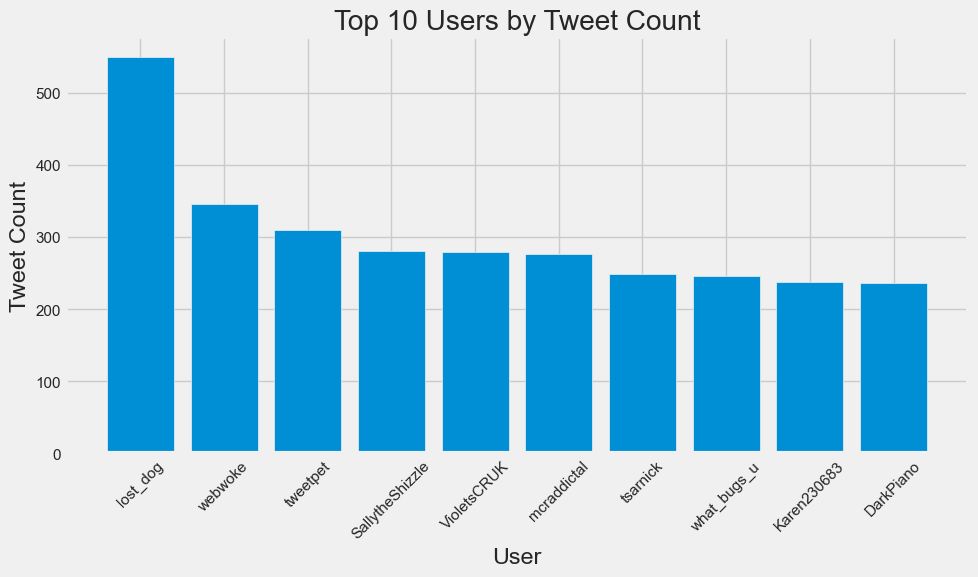

In [24]:
# Getting Data for a Graph
user_counts = cnt.most_common(10)
users = [user[0] for user in user_counts]
tweet_counts = [user[1] for user in user_counts]

# Creating a Graph
plt.figure(figsize=(10, 6))
plt.bar(users, tweet_counts)
plt.xlabel("User")
plt.ylabel("Tweet Count")
plt.title("Top 10 Users by Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Graph display
plt.show()





In [25]:
#msno.matrix(df) 

#no missing data found in dataframe

In [26]:
df_new.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by t...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichandived many times for the ball managed ...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im ...
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew


In [27]:
# Convert date column to datetime format
df_new['date'] = pd.to_datetime(df_new['date']).dt.date 

In [28]:
df_new.head()

,date,user,text
0,2009-04-06,scotthamilton,is upset that he cant update his facebook by t...
1,2009-04-06,mattycus,kenichandived many times for the ball managed ...
2,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire
3,2009-04-06,Karoli,nationwideclass no its not behaving at all im ...
4,2009-04-06,joy_wolf,kwesidei not the whole crew


In [29]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alyona_dushkina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alyona_dushkina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
#stopwords are the words which won't bring about any changes to the polarity of the tweet
stop_words = stopwords.words('english')   
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [31]:
# function to remove stopwords
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
# clean_tweet = " ".join(lemmatizer.lemmatize(word) for word in clean_tweet.split())
  return clean_tweet

In [32]:
df_new['text'] = df_new['text'].apply(lambda x: stopWords(x))

In [33]:
df_new.head()

,date,user,text
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...
2,2009-04-06,ElleCTF,whole body feels itchy like fire
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...
4,2009-04-06,joy_wolf,kwesidei whole crew


In [34]:
from textblob import TextBlob
# Function to assign polarity and subjectivity to the tweets
def blob_fun(text):
  senti = TextBlob(text)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

The "blob_fun" function calculates the polarity and subjectivity of a tweet using the TextBlob and returns the sentiment result as 'Positive' (positive), 'Negative' (negative) or 'Neutral' (neutral) along with the polarity and subjectivity values.

In [35]:
df_new['results'] = df_new['text'].apply(blob_fun)

#after executing this line of code, DataFrame df_new will contain a new "results" column, 
#in which each row will contain a dictionary with sentiment and subjectivity analysis results 
#for the corresponding text (tweet) from the "text" column.


### As a result, DataFrame df_sentiment will contain all columns from DataFrame df_new, as well as new columns with sentiment and subjectivity analysis results for each text (tweet). 
#### Now there will be a complete DataFrame with information about the texts and their sentiment analysis

In [36]:
df_sentiment = df_new.join(pd.json_normalize(data=df_new['results']))


In [37]:
df_sentiment.head()

,date,user,text,results,polarity,subjectivity,sentiment
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.0,Neutral
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500,0.5,Positive
2,2009-04-06,ElleCTF,whole body feels itchy like fire,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,Positive
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...,"{'polarity': -0.625, 'subjectivity': 1.0, 'sen...",-0.625,1.0,Negative
4,2009-04-06,joy_wolf,kwesidei whole crew,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,Positive


# An analysis of changes in sentiment over a period of time.

In [38]:
df = pd.get_dummies(df_sentiment, columns = ['sentiment'], prefix = '', drop_first=False)
# Cast columns to integer type (int)
df['_Positive'] = df['_Positive'].astype(int)
df['_Negative'] = df['_Negative'].astype(int)
df['_Neutral'] = df['_Neutral'].astype(int)

df.head()

,date,user,text,results,polarity,subjectivity,_Negative,_Neutral,_Positive
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.0,0,1,0
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500,0.5,0,0,1
2,2009-04-06,ElleCTF,whole body feels itchy like fire,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,0,0,1
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...,"{'polarity': -0.625, 'subjectivity': 1.0, 'sen...",-0.625,1.0,1,0,0
4,2009-04-06,joy_wolf,kwesidei whole crew,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,0,0,1


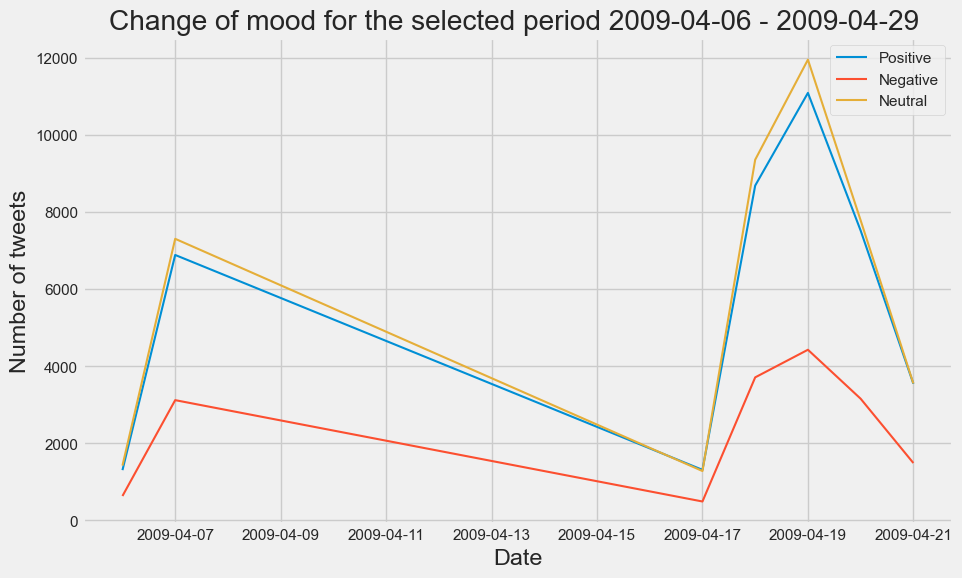

In [39]:
df['date'] = pd.to_datetime(df['date'])

# Set the selected time period
start_date = pd.to_datetime('2009-04-06')
end_date = pd.to_datetime('2009-04-29')

# Filtering a DataFrame by a selected time period
df_selected_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Group by date and count the number of tweets for each mood value
df_grouped = df_selected_period.groupby('date')[['_Positive', '_Negative', '_Neutral']].sum().reset_index()

# Building a graph of sentiment changes for a selected period
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['_Positive'], label='Positive')
plt.plot(df_grouped['date'], df_grouped['_Negative'], label='Negative')
plt.plot(df_grouped['date'], df_grouped['_Neutral'], label='Neutral')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Change of mood for the selected period 2009-04-06 - 2009-04-29 ')
plt.legend()
plt.grid(True)
plt.show()



## Сonclusion: During the selected period, there is a significant increase in positive and neutral tweets on April 19, 2009. On the other hand, on April 17, 2009, we see relatively low activity.

In [40]:
df_sentiment["sentiment"].value_counts() 

sentiment
Neutral     689148
Positive    614630
Negative    296221
Name: count, dtype: int64

In [41]:
#df_sentiment.to_csv('file3.csv', index=False)

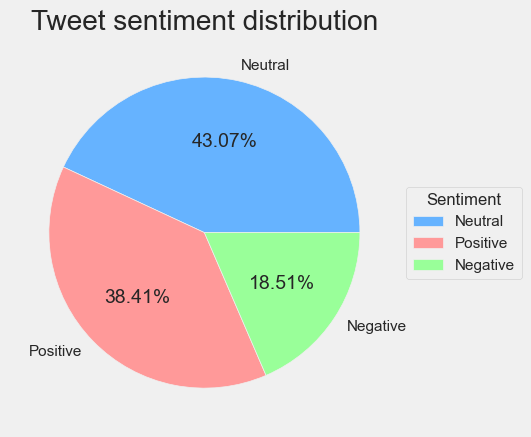

In [42]:
# Define colors for pie chart segments
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Creating a Pie Chart
ax = df_sentiment['sentiment'].value_counts().plot.pie(autopct='%.2f%%', colors=colors)

# Adding a title
plt.title('Tweet sentiment distribution')

# Set the distance between segments and their captions
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1.0, 0, 0.5, 1))

# Pie Chart Display
plt.show()

### 7/30/90 day sentiment forecast for a specific user

### As we defined earlier, "lost_dog" is the most active user from our dataframe

In [43]:
df_lost_dog = df_sentiment[df_sentiment['user'] == 'lost_dog']
df_lost_dog.head()

,date,user,text,results,polarity,subjectivity,sentiment
43934,2009-05-01,lost_dog,nylewam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
45573,2009-05-02,lost_dog,sallydam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
46918,2009-05-02,lost_dog,zuppaholicam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
47948,2009-05-02,lost_dog,lostpetusaam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
50571,2009-05-02,lost_dog,jeanleverthoodam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral


In [44]:
df_lost_dog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 43934 to 799404
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          549 non-null    object 
 1   user          549 non-null    object 
 2   text          549 non-null    object 
 3   results       549 non-null    object 
 4   polarity      549 non-null    float64
 5   subjectivity  549 non-null    float64
 6   sentiment     549 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.3+ KB


In [45]:
df_lost_dog["sentiment"].value_counts()

sentiment
Neutral    549
Name: count, dtype: int64

#### Conclusion: It is not possible to predict a good, bad or neutral tweet for a specific user for 7 days, as it is critical to have enough data to train the model so that it is adequate and accurate.
In our case, for the user "lost_dog" there are too few tweets and they are all neutral (549/549).

# Predict the total number of tweets for all users for 7, 30 and 90 days ahead

In [46]:
df_all=df_sentiment

In [47]:
df_all['date'] = pd.to_datetime(df_all['date'])
tweets_per_day = df_all.groupby(df_all['date'].dt.date)['text'].count()
tweets_per_day = pd.DataFrame(tweets_per_day)
tweets_per_day.head()

,text
date,
2009-04-06,3359
2009-04-07,17311
2009-04-17,3084
2009-04-18,21754
2009-04-19,27469


In [48]:
# df_all.to_csv('file2.csv')

It is important to make sure that the time series is stationary before applying forecasting methods. During the analysis phase, you can perform stationarity tests, such as the Dickey-Fuller test, to verify that the series is stationary, or apply differentiation methods to stabilize the series, if necessary.

In [49]:
from statsmodels.tsa.stattools import adfuller


In [50]:
# Dickey-Fuller test (ADF)
result = adfuller(tweets_per_day)

# Output of results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -3.5881326171441885
p-value: 0.005992001971768456
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064


Conclusions: 
In this case, ADF-statistic (-3.5881326171441885) is less than all critical values (-3.5778480370438146, -2.925338105429433, -2.6007735310095064) 
and p-value (0.006208455957551 378) is less than the selected significance level (for example, 0.05). 
This means that we can reject the null hypothesis that there is a unit root and consider the time series to be stationary.

In [51]:
data = df_sentiment

In [52]:
missing_values = data.isnull()
# Подсчет пропущенных значений по столбцам
missing_values_count = data.isnull().sum()

# Вывод таблицы пропущенных значений
print(missing_values)

# Вывод количества пропущенных значений по столбцам
print(missing_values_count)

          date   user   text  results  polarity  subjectivity  sentiment
0        False  False  False    False     False         False      False
1        False  False  False    False     False         False      False
2        False  False  False    False     False         False      False
3        False  False  False    False     False         False      False
4        False  False  False    False     False         False      False
...        ...    ...    ...      ...       ...           ...        ...
1599994  False  False  False    False     False         False      False
1599995  False  False  False    False     False         False      False
1599996  False  False  False    False     False         False      False
1599997  False  False  False    False     False         False      False
1599998  False  False  False    False     False         False      False

[1599999 rows x 7 columns]
date            0
user            0
text            0
results         0
polarity        0
subjec

In [53]:
df = pd.get_dummies(data, columns = ['sentiment'], prefix = '', drop_first=False)
# Cast columns to integer type (int)
df['_Positive'] = df['_Positive'].astype(int)
df['_Negative'] = df['_Negative'].astype(int)
df['_Neutral'] = df['_Neutral'].astype(int)

df.head()

,date,user,text,results,polarity,subjectivity,_Negative,_Neutral,_Positive
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.0,0,1,0
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500,0.5,0,0,1
2,2009-04-06,ElleCTF,whole body feels itchy like fire,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,0,0,1
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...,"{'polarity': -0.625, 'subjectivity': 1.0, 'sen...",-0.625,1.0,1,0,0
4,2009-04-06,joy_wolf,kwesidei whole crew,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,0,0,1


In [54]:
df1=df.query("_Positive==1")
df1.head()

,date,user,text,results,polarity,subjectivity,_Negative,_Neutral,_Positive
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500000,0.500000,0,0,1
2,2009-04-06,ElleCTF,whole body feels itchy like fire,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200000,0.400000,0,0,1
4,2009-04-06,joy_wolf,kwesidei whole crew,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200000,0.400000,0,0,1
6,2009-04-06,coZZ,loltrish hey long time see yes rainsbit onlybi...,"{'polarity': 0.3416666666666667, 'subjectivity...",0.341667,0.450000,0,0,1
13,2009-04-06,bayofwolves,smarrisonwouldve first butdidnt havegun really...,"{'polarity': 0.225, 'subjectivity': 0.26666666...",0.225000,0.266667,0,0,1


In [55]:
df1 = df1[['date','_Positive']]


In [56]:
df1['date'] = pd.to_datetime(df1['date'])
tweets_per_day = df.groupby(df1['date'].dt.date)['_Positive'].count()
tweets_per_day = pd.DataFrame(tweets_per_day).copy()
tweets_per_day.head()

,_Positive
date,
2009-04-06,1304
2009-04-07,6886
2009-04-17,1312
2009-04-18,8686
2009-04-19,11090


In [57]:
tweets_per_day.to_csv('Positive.csv', index=False) 

In [58]:
df2=df.query("_Negative==1")
df2 = df2[['date','_Negative']]
df2['date'] = pd.to_datetime(df2['date'])
tweets_per_day_negative = df2.groupby(df2['date'].dt.date)['_Negative'].count()
tweets_per_day_negative = pd.DataFrame(tweets_per_day_negative).copy()
tweets_per_day_negative.head()

,_Negative
date,
2009-04-06,633
2009-04-07,3120
2009-04-17,491
2009-04-18,3711
2009-04-19,4427


In [59]:
df3=df.query("_Neutral==1")
df3 = df3[['date','_Neutral']]

In [60]:
df3['date'] = pd.to_datetime(df3['date'])
tweets_per_day_neutral = df3.groupby(df3['date'].dt.date)['_Neutral'].count()
tweets_per_day_neutral = pd.DataFrame(tweets_per_day_neutral).copy()
tweets_per_day_neutral.head()

,_Neutral
date,
2009-04-06,1422
2009-04-07,7305
2009-04-17,1281
2009-04-18,9357
2009-04-19,11952


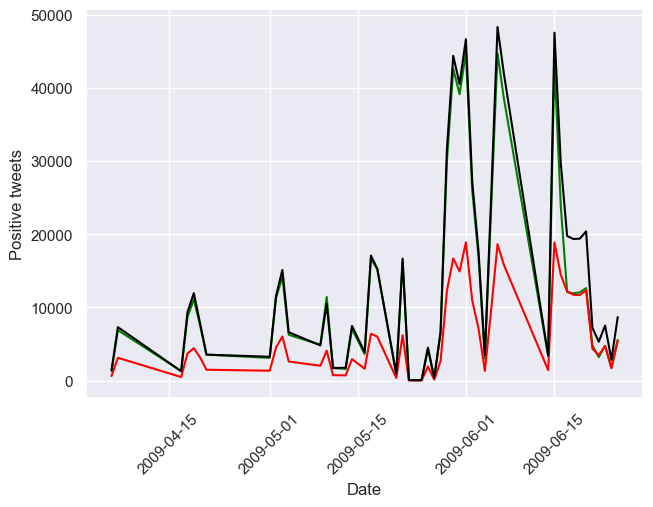

In [61]:
sns.set()

plt.ylabel('Positive tweets')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(tweets_per_day.index, tweets_per_day['_Positive'], label = 'Positive', color = "Green" )
plt.plot(tweets_per_day_negative.index, tweets_per_day_negative['_Negative'], color = "red",label = 'Negative')
plt.plot(tweets_per_day_neutral.index, tweets_per_day_neutral['_Neutral'], label = 'Neutral', color = "black" )
plt.show()

## Next, I looked at the forecasts for 7,30,90 days in 3 other Jupiter notebooks: Keras, Arima and Forcast, which I also added to the GIT repository. Sorry for the inconvenience.